In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

import matplotlib.pyplot as plt





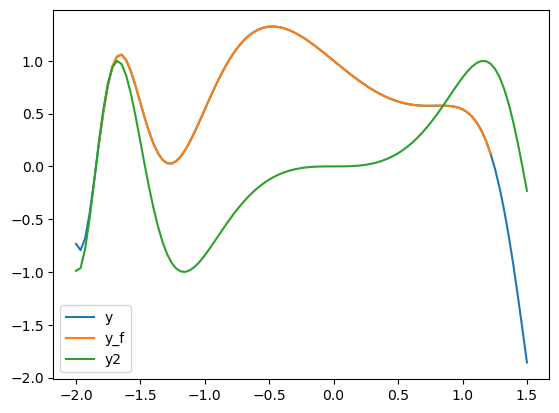

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Generating the data
x = np.linspace(-2,1.5,100)
y = np.sin(x**3) + np.cos(x**2) - np.sin(x)
y_f = y[y>0]
x_f = x[y>0]


x2 = np.linspace(-2,1.5,100)
y2 = np.sin(x2**3)

x2_f = x2[y2>0.]
y2_f = y2[y2>0.]


plt.plot(x,y,label='sin(x^3) + cos(x^2) - sin(x)')
plt.plot(x_f,y_f,)
plt.plot(x2,y2)
plt.legend(['y','y_f','y2', 'y2_f'])



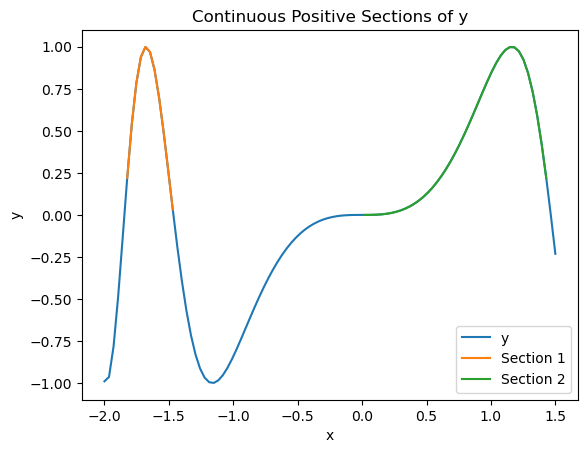

In [18]:
# Let's recreate the scenario to simulate the issue and provide a solution

# Define a new function to plot continuous sections of positive values
def plot_continuous_sections(x, y, threshold=0):
    """
    Plot only the continuous sections of y where y > threshold.
    
    Parameters:
    - x: array, independent variable values
    - y: array, dependent variable values
    - threshold: float, the threshold above which to consider y values as part of a continuous section
    """
    # Start with an empty list to hold slices of x and y that we want to plot
    x_sections = []
    y_sections = []

    # Initialize the start index of the first positive section
    start_idx = None

    # Iterate over the data to find continuous positive sections
    for i in range(len(y)):
        # If the current value is above the threshold and we are not already in a positive section
        if y[i] > threshold and start_idx is None:
            start_idx = i  # Mark the start of a positive section
        # If the current value is below the threshold and we are at the end of a positive section
        elif y[i] <= threshold and start_idx is not None:
            # Record the x and y slices of this section
            x_sections.append(x[start_idx:i])
            y_sections.append(y[start_idx:i])
            start_idx = None  # Reset the start index for the next section
    
    # Check if the last section ends at the end of the array
    if start_idx is not None:
        x_sections.append(x[start_idx:])
        y_sections.append(y[start_idx:])

    # Plot each continuous section
    for i, (x_sec, y_sec) in enumerate(zip(x_sections, y_sections)):
        plt.plot(x_sec, y_sec, label=f'Section {i+1}')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Continuous Positive Sections of y')
    plt.legend()
    plt.show()

# Generating the data
x = np.linspace(-2, 1.5, 100)
y = np.sin(x**3) 

# Plot the function
plt.plot(x, y, label='y')

# Plot continuous sections of positive values
plot_continuous_sections(x, y)


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.interpolate import interp1d

# Define a function to find continuous positive sections
def find_continuous_positive_sections(x, y):
    sections = []
    start_idx = None
    for i in range(len(y)):
        if y[i] > 0 and start_idx is None:
            start_idx = i
        elif y[i] <= 0 and start_idx is not None:
            sections.append((x[start_idx:i], y[start_idx:i]))
            start_idx = None
    if start_idx is not None:
        sections.append((x[start_idx:], y[start_idx:]))
    return sections

# Generating the data for both functions
x = np.linspace(-2, 2, 100)
y = np.sin(x**3) + np.cos(x**2) - np.sin(x)
x2 = np.linspace(-2, 2, 100)
y2 = np.sin(x2**3)

# Find continuous sections where y > 0
sections_y = find_continuous_positive_sections(x, y)

# Find continuous sections where y2 > 0
sections_y2 = find_continuous_positive_sections(x2, y2)

# List to store the correlations
correlations = []

# We interpolate and correlate only if we have matching sections
for x_sec_y, y_sec_y in sections_y:
    # Find the x range for the current y section
    x_min, x_max = x_sec_y[0], x_sec_y[-1]
    
    # For each y2 section, check if the x range overlaps with the current y section
    for x_sec_y2, y_sec_y2 in sections_y2:
        if x_sec_y2[0] <= x_max and x_sec_y2[-1] >= x_min:
            # The sections overlap, find the common range
            common_x_min = max(x_min, x_sec_y2[0])
            common_x_max = min(x_max, x_sec_y2[-1])
            
            # Interpolate both sections to a common x range for comparison
            common_x = np.linspace(common_x_min, common_x_max, num=50)  # 50 points for the correlation
            interp_y = interp1d(x_sec_y, y_sec_y, kind='linear', fill_value="extrapolate")(common_x)
            interp_y2 = interp1d(x_sec_y2, y_sec_y2, kind='linear', fill_value="extrapolate")(common_x)
            
            # Compute the Pearson correlation for this common range
            corr, _ = pearsonr(interp_y, interp_y2)
            correlations.append(corr)

# Output the correlations
print(correlations)


[0.8777225074111346, -0.8310833587131844]


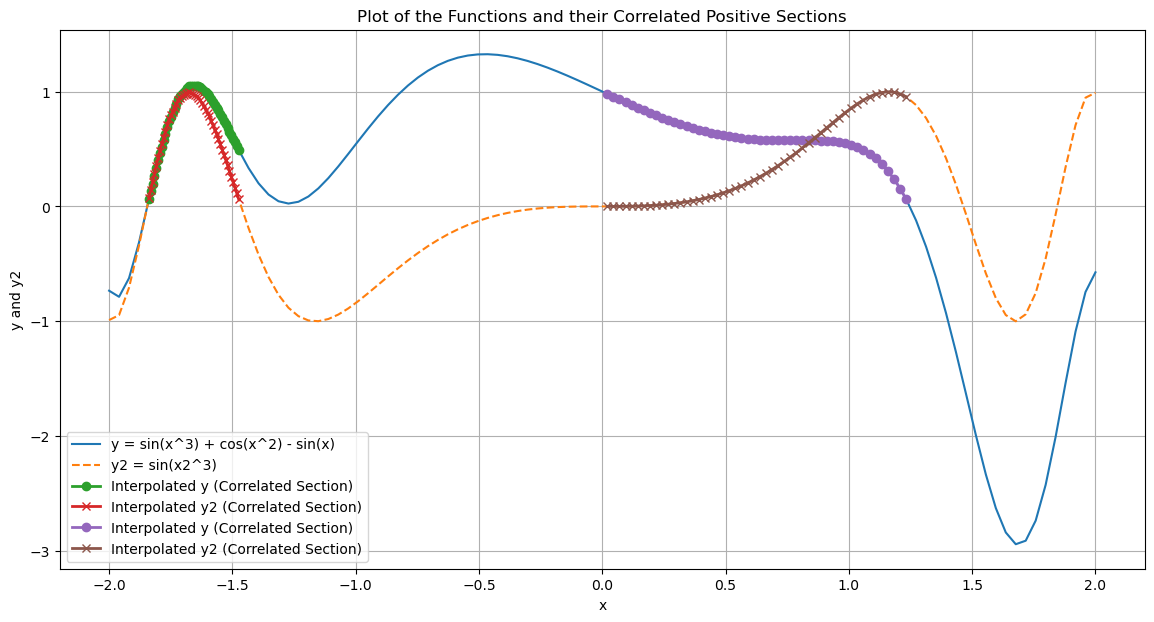

In [20]:
# Generate the plot for the correlated sections
plt.figure(figsize=(14, 7))

# Plot the original functions
plt.plot(x, y, label='y = sin(x^3) + cos(x^2) - sin(x)')
plt.plot(x2, y2, label='y2 = sin(x2^3)', linestyle='--')

# We interpolate and correlate only if we have matching sections
for x_sec_y, y_sec_y in sections_y:
    # Find the x range for the current y section
    x_min, x_max = x_sec_y[0], x_sec_y[-1]
    
    # For each y2 section, check if the x range overlaps with the current y section
    for x_sec_y2, y_sec_y2 in sections_y2:
        if x_sec_y2[0] <= x_max and x_sec_y2[-1] >= x_min:
            # The sections overlap, find the common range
            common_x_min = max(x_min, x_sec_y2[0])
            common_x_max = min(x_max, x_sec_y2[-1])
            
            # Interpolate both sections to a common x range for comparison
            common_x = np.linspace(common_x_min, common_x_max, num=50)  # 50 points for the correlation
            interp_y = interp1d(x_sec_y, y_sec_y, kind='linear', fill_value="extrapolate")(common_x)
            interp_y2 = interp1d(x_sec_y2, y_sec_y2, kind='linear', fill_value="extrapolate")(common_x)
            
            # Plot the interpolated, correlated sections
            plt.plot(common_x, interp_y, label='Interpolated y (Correlated Section)', linewidth=2, marker='o')
            plt.plot(common_x, interp_y2, label='Interpolated y2 (Correlated Section)', linewidth=2, marker='x')

# Decorate the plot
plt.xlabel('x')
plt.ylabel('y and y2')
plt.title('Plot of the Functions and their Correlated Positive Sections')
plt.legend()
plt.grid(True)
plt.show()
